In [1]:
import pandas as pd
import csv
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from os import listdir, walk
from os.path import isfile, join
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib

In [2]:
volumes = ['chameleon', 'combustion64', 'flower', 'supernova1328', 'vortex64', 'zeiss']

In [3]:
path = r'/mnt/nethome/brudervn/data/foveated/benchmarks/paper/'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
print(onlyfiles)

['chameleon_LBG-Sampling', 'chameleon_Standard', 'combustion64_LBG-Sampling', 'combustion64_Standard', 'flower_LBG-Sampling', 'flower_Standard', 'supernova1328_LBG-Sampling', 'supernova1328_Standard', 'vortex64_LBG-Sampling', 'vortex64_Standard', 'zeiss_LBG-Sampling', 'zeiss_Standard']


In [4]:
df_std = []
df_fov = []

for i in range(0, len(volumes)):
    f_std = open(path + volumes[i] + '_Standard')
    f_fov = open(path + volumes[i] + '_LBG-Sampling')
    df_std.append(pd.read_csv(f_std, delimiter=';', header=None))
    df_fov.append(pd.read_csv(f_fov, delimiter=';', header=None))

In [5]:
for i in range(0, len(volumes)):    
    df_std[i].columns = ['t', 'rotation', 'translation', 'gaze', 'exec']
    df_fov[i].columns = ['t', 'rotation', 'translation', 'gaze', 'exec']

In [6]:
df_medians_std = []
df_medians_fov = []

interpol_mean = []
interpol_std = []

for i in range(0, len(volumes)):
    df_medians_std.append(df_std[i].groupby('rotation', sort=False).median())
    df_medians_fov.append(df_fov[i].groupby(['rotation', 'gaze'], sort=False).median())
    print(volumes[i])
#     print(' standard fps:')
#     print('  mean: ' + str(1.0 / df_medians_std[i]['exec'].mean()))
#     print('  std: ' + str(1.0 / df_medians_std[i]['exec'].std()))
#     print('  min: ' + str(1.0 / df_medians_std[i]['exec'].min()))
#     print('  max: ' + str(1.0 / df_medians_std[i]['exec'].max()))         
#     print(' foveated fps:')
    print('  mean: ' + str(df_medians_fov[i]['exec'].mean() * 1000))
    print('  std: ' + str(df_medians_fov[i]['exec'].std() * 1000))
#     print('  min: ' + str(1.0 / df_medians_fov[i]['exec'].min()))
#     print('  max: ' + str(1.0 / df_medians_fov[i]['exec'].max()))  
    interpol_mean.append(df_medians_fov[i]['exec'].mean() * 1000)
    interpol_std.append(df_medians_fov[i]['exec'].std() * 1000)

sum(interpol_std) / len(interpol_std)

chameleon
  mean: 10.02194343239171
  std: 5.165157152432522
combustion64
  mean: 6.485221916616566
  std: 3.059373688688805
flower
  mean: 13.499732928786077
  std: 7.28985553911689
supernova1328
  mean: 9.498881481445347
  std: 3.874573235879714
vortex64
  mean: 9.535821602989788
  std: 2.8989294076812646
zeiss
  mean: 5.646796889047538
  std: 2.1860174946399833


4.0789844197398635

# gaze vs regular

In [7]:
df_gaze_mean = []
for i in range(0, len(volumes)):
    df_gaze_mean.append(df_medians_fov[i].groupby('rotation', sort=False).mean())

In [8]:
df_merge = []
speedup = []
for i in range(0, len(volumes)):
    df_merge = pd.merge(df_medians_std[i], df_gaze_mean[i],  how='left', left_on=['rotation'], right_on = ['rotation'])
    speedup.append(df_merge['exec_x'] / df_merge['exec_y'])
    print(volumes[i])
    print('mean ' + str(speedup[i].mean()))
    print('median ' + str(speedup[i].median()))

chameleon
mean 2.8170918603597204
median 2.8086361611782533
combustion64
mean 1.9292755454850399
median 1.9603168029877853
flower
mean 2.990567093988071
median 3.49539183105448
supernova1328
mean 2.70240768024247
median 2.759539069798884
vortex64
mean 3.165996602457064
median 3.188047326328962
zeiss
mean 1.831810453565573
median 1.8221193399341322


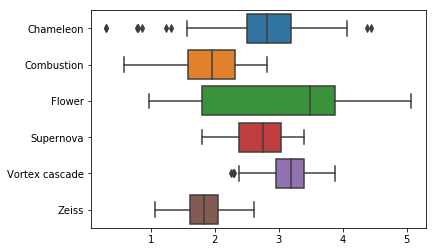

In [9]:
volume_lbls = ['Chameleon', 'Combustion', 'Flower', 'Supernova', 'Vortex cascade', 'Zeiss']
ax = sns.boxplot(y=volume_lbls, x=speedup)

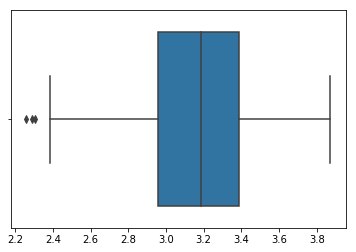

In [10]:
ax = sns.boxplot(x=speedup[4])

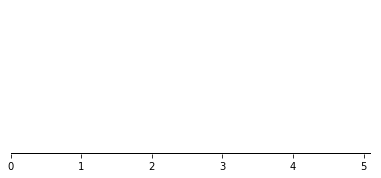

In [11]:
fig = plt.figure()
fig.set_size_inches(5,2)

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_xlim(-0.0001,5.1)
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
#matplotlib.rc('xtick', labelsize=20) 

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))

fig.add_axes(ax)

#ax.boxplot(speedup[0], vert=False)
plt.show()
fig.savefig('box_axis.pdf', bbox_inches='tight', pad_inches=0)

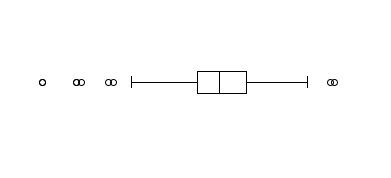

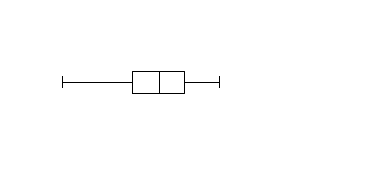

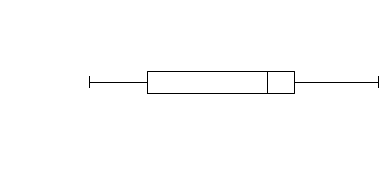

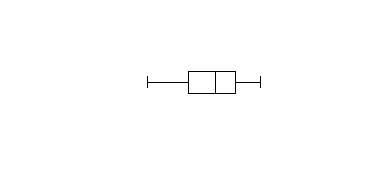

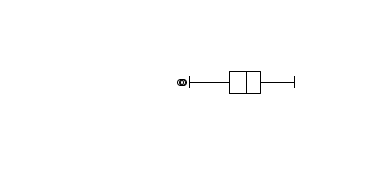

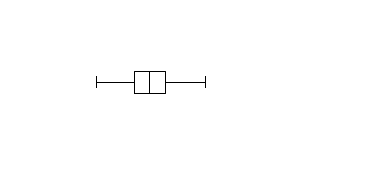

In [12]:
for i in range(0, len(volumes)):
    fig = plt.figure(frameon=False)
    fig.set_size_inches(5,2)

    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_xlim(0,5.1)
    ax.set_axis_off()
    fig.add_axes(ax)

    bp = ax.boxplot(speedup[i], vert=False)
    plt.setp(bp['medians'], color='black')
    
    plt.show()
    fig.savefig('box_' + volumes[i] + '.pdf', bbox_inches='tight', pad_inches=0)